# Анализ поведения пользователей в мобильном приложении

## Материалы:
1. [Презентация](https://disk.yandex.ru/i/9FdLb2haF7ijbA)
2. [Дашборд](https://public.tableau.com/app/profile/polina2301/viz/app_dash/Dashboard1?publish=yes)

**Цель исследования** – проанализировать поведение пользователей в мобильном приложении "Ненужные вещи". Исследование должно помочь продуктовой команде составить портреты целевой аудитории и улучшить вовлеченность пользователей. 

**Задачи исследования:**
1. Узнать, какие события влияют на конверсию в целевое действие?
2. Узнать, какие сценарии использования приложения выделяются?
3. Узнать, как различается время между распространенными событиями пользователей?

**Ход исследования:** 

**1. Обзор данных.**
* Ознакомиться с  данными в датасетах.
* Посмотреть общую информацию о датасетах.

**2. Предобработка данных и подготовка их к анализу.**
* Проверить корректность названий столбцов.
* Проверить корректность типов данных.
* Проверить данные на пропуски и дубликаты.
* Проверить данные на аномальные значения. Посмотреть, есть ли в данных выбросы и, если есть, определить, из-за чего они могли появиться?
* Проверить события – все ли они отражают уникальные события или можно что-то объединить? Обратить внимание на contacts_show и show_contacts, а также на search_1—search_7.

**3. Исследовательский анализ данных.**
* Узнать, сколько всего событий и уникальных пользователей в логе, сколько в среднем событий приходится на пользователя. Посмотреть, данными за какой период мы располагаем.
* Выделить сессии пользователей и разные сценарии пользования приложением (из рекомендаций, через поиск и т.д.). Построить воронки событий и посмотреть, как пользователи доходят до целевого события (просмотра контактов). Сколько пользователей доходит до него, а сколько — «застревает» на предыдущих шагах? На каких именно?
* Посмотреть, какие события влияют на конверсию в целевое действие? Рассмотреть каждое действие отдельно.
* Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.
* Узнать, как различается время между распространенными событиями пользователей.

**4. Проверка гипотез.**
* Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show. Проверить гипотезу: конверсия в просмотры контактов различается у этих двух групп.
* Некоторые пользователи добавляют объявления в избранное, а некоторые – нет. Проверить гипотезу: конверсия в просмотры контактов различается у этих двух групп.

H1: Конверсии групп пользователей, кто добавляет в избранное, а кто нет – равны.\
H2: Конверсии групп пользователей, кто добавляет в избранное, а кто нет – различны.

Проверить гипотезы с помощью z-теста.

**5. Выводы, рекомендации.**

**6. Оформление результатов в презентацию и создание дашборда.**

На дашборде представить:
* Диаграмму распределения количества событий по типу события.
* Индикатор количества пользователей.
* Фильтр дашборда по дате совершения события.

## 1. Обзор данных

Откроем файлы с данными и изучим общую информацию

In [1]:
# настроим нашу тетрадку так, чтобы все графики были картинками (пригодится для github)
%pip install -U kaleido -q
import plotly.io as pio
pio.renderers.default = "png"

# импортируем библиотеки для анализа 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from plotly import graph_objects as go
import scipy.stats as stats
import math as mth
import warnings

Note: you may need to restart the kernel to use updated packages.


In [2]:
sources, datasets = (
    pd.read_csv('/Users/polinamokretsova/mobile_sourсes.csv'), # данные об источниках скачивания приложения
    pd.read_csv('/Users/polinamokretsova/mobile_dataset.csv')  # данные о действиях пользователей
)    

In [3]:
# посмотрим первые 5 строе датафрэйма sources
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [4]:
# посмотрим первые 5 строе датафрэйма datasets
datasets.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [5]:
# посмотрим на общую информацию о датафрэймах
sources.info()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Мы посмотрели общую информацию о датафрэймах и вот, что выяснили:
* столбцы названы некорректно и неудобно для использования
* некорректный тип данных в столбце event.time в датафрэйме datasets - object

На следующем этапе во время предобработки данных мы исправим эти моменты и проверим данные на дубликаты и пропуски.

## 2. Предобработка данных и подготовка их к анализу

**Переименуем названия столбцов в датафрэймах**

In [6]:
sources.columns

Index(['userId', 'source'], dtype='object')

In [7]:
# переименуем названия столбцов для удобства и правильного стиля
sources.columns = ['user_id', 'source']

In [8]:
datasets.columns

Index(['event.time', 'event.name', 'user.id'], dtype='object')

In [9]:
# переименуем названия столбцов для удобства и правильного стиля
datasets.columns = ['event_time', 'event_name', 'user_id']

**Изменим тип данных в столбце event_time в датафрэйме datasets**

In [10]:
# изменим тип данных 
datasets['event_time'] = pd.to_datetime(datasets['event_time'])

**Проверим данные на пропуски**

In [11]:
# проверим на пропуски sources
sources.isna().sum()

user_id    0
source     0
dtype: int64

In [12]:
# проверим на пропуски datasets 
datasets.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

**Проверим данные на дубликаты**

In [13]:
# проверим на дубликаты sources
sources.duplicated().sum()

0

In [14]:
# проверим на дубликаты datasets
datasets.duplicated().sum()

0

**Проверим данные на аномальные значения**

In [15]:
# создадим переменную, в которой будут пользователи и количество совершенных ими действий
events_per_user = datasets.groupby('user_id')['event_name'].count()\
                          .to_frame()\
                          .rename(columns={'event_name': 'total_events'})\
                          .reset_index()
                          
events_per_user.describe()

,total_events
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,478.000000


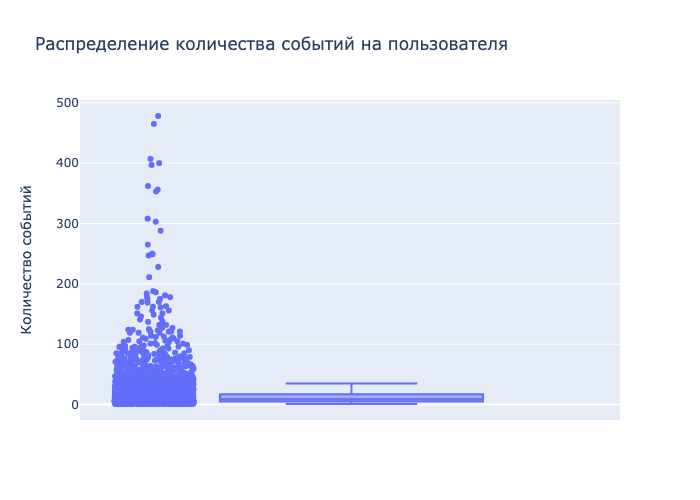

In [16]:
# визуализируем распределение событий с помощью диаграммы рассеяния
fig = px.box(events_per_user, y="total_events", points="all", title='Распределение количества событий на пользователя')
fig.update_yaxes(title_text='Количество событий')
fig.show()

Как мы видим из диаграммы у большей часть наших пользователей было до 50 событий. Медианное количество событий - 9. 

Также мы видим, что в наших данных есть и аномальные значения. Несколько пользователей совершили больше 400 действий. Скорее всего это технический сбой или приложение было открыто на фоне, а человек случайно совершил столько событий. Кроме аномально большого количества событий, в наших данных есть пользователи, совершившие всего одно событие. Это странно, надо рассмотреть таких пользователей более детально.

In [17]:
events_per_user[events_per_user['total_events'] == 1].count()

user_id         65
total_events    65
dtype: int64

In [18]:
events_per_user[events_per_user['total_events'] > 200].count()

user_id         17
total_events    17
dtype: int64

Всего 65 пользователей совершили 1 событие в приложении. И 17 пользователей, совершивших больше 200 событий. От общего количества уникальных пользоватей это 1,9%. Мы можем удалить этих пользователей из анализа, так как эти данные не репрезентативны.

In [19]:
events_per_user = events_per_user[(events_per_user['total_events'] != 1) & (events_per_user['total_events'] <= 200)]

In [20]:
# создадим копию исходного датафрейма, чтобы в случае чего отследить ошибки
filter_df = datasets

In [21]:
# создадим список с отобранными user_id
filter_users = events_per_user['user_id']
filter_df = filter_df.loc[filter_df['user_id'].isin(filter_users)]

In [22]:
# проверим, сколько данных мы потеряли в ходе предобработки

events = datasets.shape[0] # количество событий до очистки данных
filter_events = filter_df.shape[0] # количество событий после очистки данных

users = datasets['user_id'].nunique() # количество пользователей до очистки данных
filter_users = filter_df['user_id'].nunique() # количество пользователей после очистки данных

print(f'Было событий до очистки данных = {events}. Стало после очистки = {filter_events}') 
print(f'На сколько уменьшилось количество событий = {events-filter_events}. Потяря в процентах = {round((events-filter_events)/events*100,2)}%')
print()
print(f'Было пользователей до очистки данных = {users}. Стало после очистки = {filter_users}') 
print(f'На сколько уменьшилось количество пользователей = {users-filter_users}. Потяря в процентах = {round((users-filter_users)/users*100,2)}%')

Было событий до очистки данных = 74197. Стало после очистки = 68565
На сколько уменьшилось количество событий = 5632. Потяря в процентах = 7.59%

Было пользователей до очистки данных = 4293. Стало после очистки = 4211
На сколько уменьшилось количество пользователей = 82. Потяря в процентах = 1.91%


**Посмотрим на события и проверим все ли они отражают уникальные события?**

In [23]:
# выведем названия событий и количество событий, совершенных пользователями
filter_df['event_name'].value_counts()

tips_show        36576
photos_show       9831
advert_open       5654
contacts_show     3766
search_1          3471
map               3442
favorites_add     1323
search_5          1021
tips_click         763
search_4           692
contacts_call      541
search_3           467
search_6           456
search_2           317
search_7           220
show_contacts       25
Name: event_name, dtype: int64

Ознакомишись с событиями, которые совершают пользователи, мы выяснили, что contacts_show и show_contacts означают одно и то же действие - просмотр номера телефона. А события search_1—search_7 - действия, связанные с поиском по сайту. Объединим эти дейтсвия в contacts_show и search.

In [24]:
warnings.filterwarnings('ignore')
# объединим contacts_show и show_contacts в contacts_show
for i in filter_df.index:
    if filter_df.loc[i, 'event_name'] == 'show_contacts':
        filter_df.loc[i,'event_name'] = 'contacts_show'

In [25]:
# объединим search_1—search_7 в search
filter_df.loc[filter_df['event_name'].str.contains('search_'), 'event_name'] = 'search'

In [26]:
# посмотрим, что у нас вышло в итоге 
filter_df['event_name'].value_counts()

tips_show        36576
photos_show       9831
search            6644
advert_open       5654
contacts_show     3791
map               3442
favorites_add     1323
tips_click         763
contacts_call      541
Name: event_name, dtype: int64

In [27]:
# после проделанной предобработки данных, проверим еще раз на дубликаты filter_df
filter_df.duplicated().sum()

0

В ходе предобработки данных мы: 
* Изменили названия столбцов на корректные.
* Изменили тип данных в столбце с датой и временем.
* Проверили данные на пропуски и дубликаты. Они не были обнаружены.
* Проверили данные на аномальные значения. Мы рассмотрели количество событий, которые совершают уникальные пользователи. Выяснили, что некоторые совершают всего одно событие, а некоторые больше 400. Это похоже на выбросы, которые произошли в ходе технических неполадок или пользователь использовал приложение в фоновом режиме и случайно совершил так много действий. Было решено удалить тех, кто совершил аномально мало и аномально много событий, так как эти данные не репрезентативны для анализа.
* Ознакомились с событиями, которые есть в наших данных. Выяснили, что не все они означают уникальные действия. Мы объединили просмотр контактов в событие "contacts_show", а действия, связанные с поиском по сайту, в событие "search".

Приступим к исследовательскому анализу данных.

## 3. Исследовательский анализ данных

**Посмотрим, сколько всего событий, сколько типов событий и сколько уникальных пользователей в логе**

In [28]:
print('Всего событий: %d, типов событий: %d.' % (filter_df.shape[0], filter_df['event_name'].nunique()))
print('Всего уникальных пользователей в логе: %d.' % (filter_df['user_id'].nunique()))

Всего событий: 68565, типов событий: 9.
Всего уникальных пользователей в логе: 4211.


**Посмотрим, сколько событий приходится в среднем на каждого пользователя**

In [29]:
print('В среднем событий на пользователя: %d.' % (filter_df.shape[0]/filter_df['user_id'].nunique()))

В среднем событий на пользователя: 16.


In [30]:
events_per_user.describe()

,total_events
count,4211.000000
mean,16.282356
std,21.108605
min,2.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,188.000000


В среднем на пользователя приходится 16 событий. 

**Посмотрим, данными за какой период мы располагаем**

In [31]:
dt_max = filter_df['event_time'].max() # максимальная дата
dt_min = filter_df['event_time'].min() # минимальная дата
print('Максимальная дата:', dt_max)
print('Минимальная дата:', dt_min)
print()

period = dt_max - dt_min # разница между максимальной и минимальной датой
print('Мы располагаем данными за период:', period)

Максимальная дата: 2019-11-03 23:56:57.041825
Минимальная дата: 2019-10-07 00:00:00.431357

Мы располагаем данными за период: 27 days 23:56:56.610468


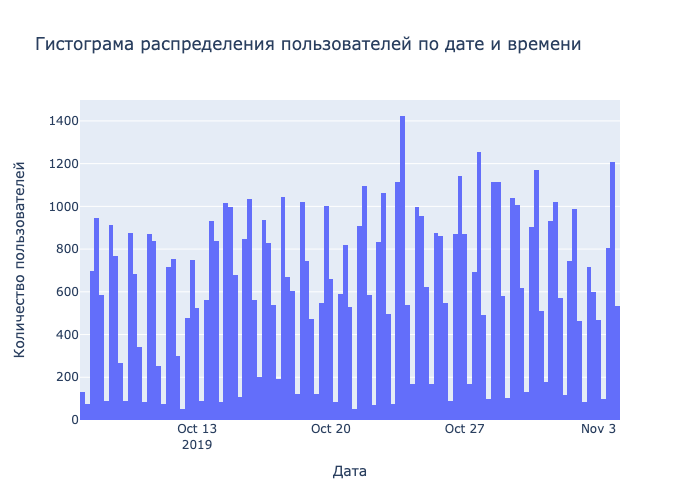

In [32]:
# построим гистограму распределения пользователей по дате и времени
fig = px.histogram(filter_df, x='event_time', title='Гистограма распределения пользователей по дате и времени')
fig.update_xaxes(title_text='Дата') 
fig.update_yaxes(title_text='Количество пользователей')
fig.show()

Мы имеем одинаково полные данные за весь период. Видим, что пик активности пользователей обычно приходится на вторую половину дня. 

**Разделим события на сессии**\
Выделять сессии будем относительно тайм-аута. Если между событиями время больше определенного порога (мы установим порог в 30 минут), то их будем относить к разным сессиям.

In [33]:
# определим разницу 30 минут для каждой группы 
filter_df = filter_df.sort_values(['user_id', 'event_time'])
g = (filter_df.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
# создадим столбец, где будут определены сессии
filter_df['session_id'] = filter_df.groupby(['user_id', g], sort=False).ngroup() + 1
filter_df

,event_time,event_name,user_id,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
...,...,...,...,...
54919,2019-10-28 07:08:57.160017,search,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807
54920,2019-10-28 07:13:03.805332,search,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807
54921,2019-10-28 07:14:21.177488,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807
54922,2019-10-28 07:15:10.094101,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807


**В разрезе по сессиям посмотрим на пользовательские сценарии и выделим самые популярные**

In [34]:
# сгруппируем датафрэйм по session_id, посчитаем количество таких паттернов и посмотреим на самые популярные сочетания
sessions = filter_df.groupby('session_id', as_index=False).agg(event_flow=('event_name','unique'))
sessions

,session_id,event_flow
0,1,[tips_show]
1,2,"[map, tips_show]"
2,3,"[tips_show, map]"
3,4,"[map, tips_show]"
4,5,"[search, photos_show]"
...,...,...
9802,9803,"[photos_show, contacts_show]"
9803,9804,"[tips_show, map]"
9804,9805,"[search, photos_show]"
9805,9806,"[contacts_show, photos_show]"


In [35]:
sessions['event_flow'] = sessions['event_flow'].apply(lambda x: str(x)) # переводим значения в столбце в строки
sessions['event_flow'] = sessions['event_flow'].apply(lambda x: x.replace(' ','')) # избавляемся от длинных пропусков

In [36]:
# создадим датафрэйм для сценариев, посчитаем количество повторений каждого сценария
scenarios = pd.DataFrame(sessions['event_flow'].value_counts()).reset_index(drop = False)

In [37]:
# добавим столбец с количеством событий в каждом сценарии
# для этого посчитаем количество скобок и разделим на 2, так как каждое событие заключено в двойные скобки
scenarios['number_of_actions'] = scenarios['index'].apply(lambda x: x.count("'")/2)

In [38]:
# нас интересует те сценарии, где было больше 2 действий, они более репрезентативны
scenarios[scenarios['number_of_actions'] > 2].head(30)

,index,event_flow,number_of_actions
9,['map''advert_open''tips_show'],169,3.0
16,['search''map''tips_show'],102,3.0
18,['search''map''advert_open''tips_show'],77,4.0
19,['map''tips_show''contacts_show'],77,3.0
22,['search''contacts_show''contacts_call'],54,3.0
27,['search''photos_show''contacts_show'],45,3.0
29,['map''tips_show''advert_open'],44,3.0
30,['tips_show''map''advert_open'],43,3.0
31,['search''tips_show''map'],39,3.0
32,['search''photos_show''favorites_add'],38,3.0


Выделив популярные сценарии, мы замечаем, что:
* Многие сценарии не оканчиваются целевым действием. Например, map > advert_open > tips_show.  Или search > map > tips_show. Это нормально, далеко не все быстро находят нужное объявление и смотрят на контакты. 
* Есть и такие сценарии, которые начинаются сразу с целевого действия – просмотра контактов. Скорее всего такие пользователи пришли по прямой ссылке на контакты. 
* Нам будет недостаточно только популярных сценариев для полного понимания картины, наши данные достаточно грязные. **Некоторые из сценариев выглядят хаотично, не отражают логичный алгоритм действий.** Возможно, это связано с тем, что приложение не очень удобно и неэргономично для пользователей. Люди могут не понимать, как эффективно пользоваться приложением и нажимают все кнопки. Этот момент, возможно, следует взять в работу и уточнить у тестировщиков, всё ли работает в приложении верно. А для дальнейшего анализа мы будем рассматривать, как популярные сценарии, так и дополнительные, которые пропишем самостоятельно.

**Рассмотрим сценарии пользования приложением, где результатом будет целевое действие - просмотр контактов**

В наших данных есть 9 событий, которые, как мы выяснили, не идут последовательно друг за другом. Некоторые проходят несколько этапов до просмотра контактов, а некоторые – переходят на них по прямой ссылке. Также наши пользователи делятся на тех, кто пришел на объявление через поиск, и тех, кто пришел через рекомендацию. Эти сценарии необходимо рассматривать отдельно.

Следовательно, сценариев пользования приложением у нас несколько и несколько воронок конверсий в целевое действие. Целевым (завершающим) действием будем считать просмотр контактов, так как не всегда система фиксирует звонок.

**Сценарии**

Пользователи, которые пришли через **поиск**

*Из таблицы с популярными сценариями:*

**1 сценарий** – искал на сайте, посмотрел фотографии и открыл контакты.

`search - совершал разные действия, связанные с поиском по сайту`\
`photos_show - просмотрел фотографий в объявлении`\
`contacts_show - посмотрел номер телефона`

*Дополнительные сценарии:*

**2 сценарий** - искал на сайте, открыл карточки объявления и посмотрел контакты. 

`search - совершал разные действия, связанные с поиском по сайту`\
`advert_open - открыл карточки объявления`\
`contacts_show - посмотрел номер телефона`

**3 сценарий** - искал на сайте, добавил в избранное, посмотрел контакты.

`search - совершал разные действия, связанные с поиском по сайту`\
`favorites_add — добавил объявление в избранное`\
`contacts_show - посмотрел номер телефона`

**4 сценарий** - искал на сайте, открыл карту, посмотрел контакты.

`search - совершал разные действия, связанные с поиском по сайту`\
`map - открыл карту объявлений`\
`contacts_show - посмотрел номер телефона`

Пользователи, которые пришли через **рекомендованные объявления**

Из таблицы с популярными сценариями:

**1 сценарий** – увидел рекомендованные, посмотрел на карту и после открыл номер телефона.

`tips_show - увидел рекомендованные объявления`\
`map - открыл карту объявлений`\
`contacts_show - посмотрел номер телефона`

**2 сценарий** – увидел рекомендацию, кликнул, посмотрел номер телефона 

`tips_show - увидел рекомендованные объявления`\
`tips_click - кликнул по рекомендованному объявлению`\
`contacts_show - посмотрел номер телефона`

Дополнительные сценарии: 

**3 сценарий** – кликнул по рекомендованному объявлению, добавил в избранное, посмотрел номер телефона 

`tips_click - кликнул по рекомендованному объявлению`\
`favorites_add — добавил объявление в избранное`\
`contacts_show - посмотрел номер телефона`

**4 сценарий** – кликнул по рекомендованному объявлению, посмотрел фото, открыл номер телефона 

`tips_click - кликнул по рекомендованному объявлению`\
`photos_show — посмотрел фотографии в объявлении`\
`contacts_show - посмотрел номер телефона`

**Напишем функцию для построения воронок по нашим сценариям**\
Функция funnel будет брать на вход датафрэйм и события сценариев. Затем подсчитывать количество человек на первом событии, на следующем событии и на целевом событии. После произведенных расчетов строить воронку событий и выводить на экран. 

In [39]:
def funnel (data, event1, event2, event3):
    a = data[data['event_name'] == event1]
    a_id = a['user_id'].unique()
    a = a['user_id'].nunique()
        
    b = data.query('user_id in @a_id')
    b = b[b['event_name'] == event2]
    b_id = b['user_id'].unique()
    b = b['user_id'].nunique()
        
    c = data.query('user_id in @b_id')
    c = c[c['event_name'] == event3]
    c = c['user_id'].nunique()
        
    x = [a, b, c]
    y = [event1, event2, event3]
        
    fig = go.Figure(go.Funnel(
        y = y,
        x = x,
        textinfo = "value+percent initial + percent previous"))
    fig.show()

**Воронки для пользователей, которые пришли через поиск**

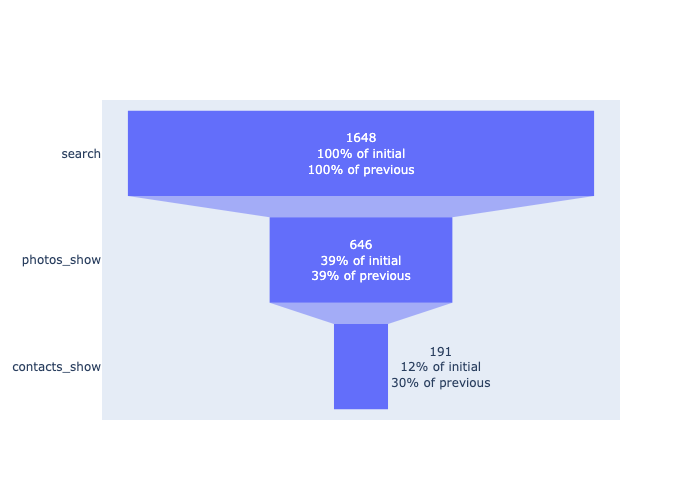

In [40]:
# 1 сценарий

#search - совершал разные действия, связанные с поиском по сайту
#photos_show - просмотрел фотографий в объявлении
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'search', 'photos_show', 'contacts_show')

После поиска по сайту, на просмотр фотографий переходит 39% пользователей. И 30% переходит затем к просмотру номера телефона, что составляет 12% от исходного числа пользователей.

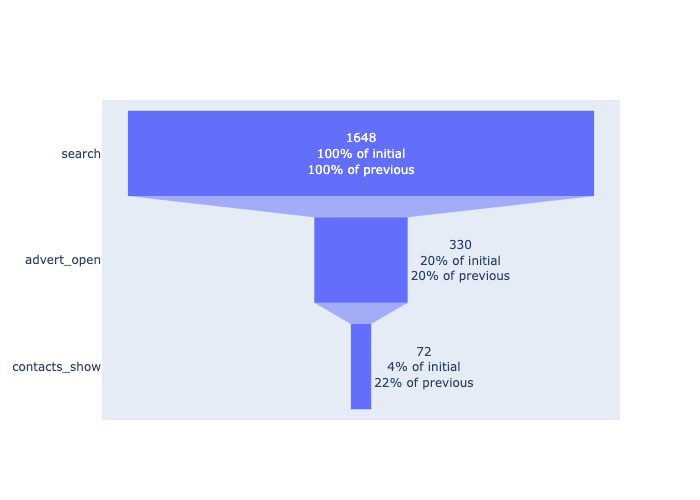

In [41]:
# 2 сценарий

#search - совершал разные действия, связанные с поиском по сайту
#advert_open - открыл карточки объявления
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'search', 'advert_open', 'contacts_show')

После поиска по сайту всего 20% открывает карточку объявления. И 22% из них открывают номер телефона.

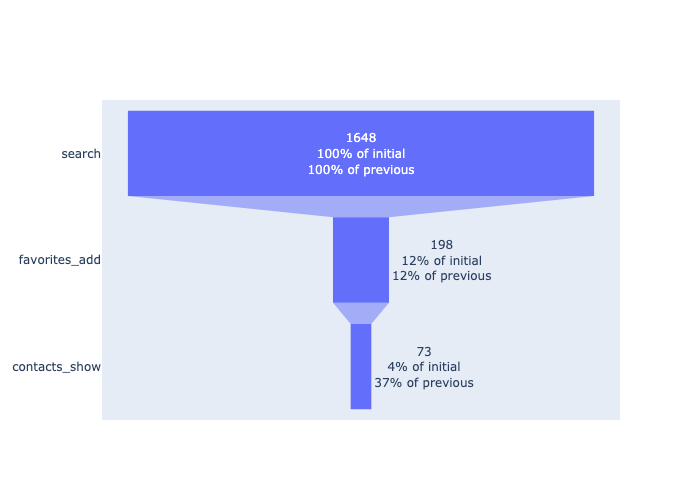

In [42]:
# 3 сценарий

#search - совершал разные действия, связанные с поиском по сайту
#favorites_add — добавил объявление в избранное
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'search', 'favorites_add', 'contacts_show')

После поиска по сайту всего 12% пользователей добавляет объявление в избранное. Но 37% из них возвращается к объявлению и открывает номер телефона. Значит, добавление в избранное хорошо работает для конверсии в целевое действие.

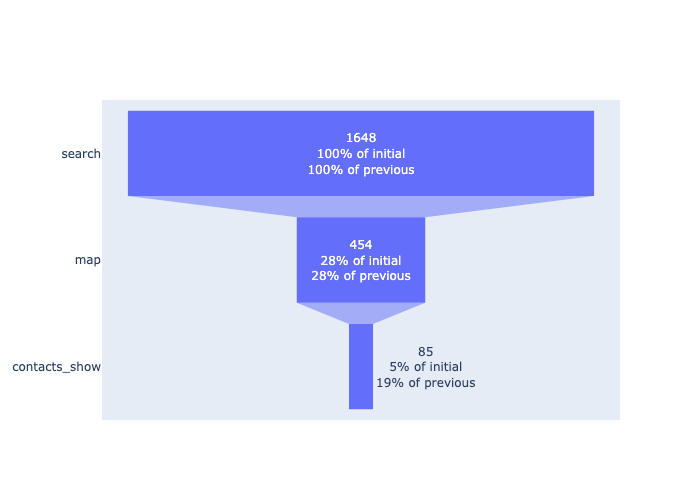

In [43]:
# 4 сценарий 

#search - совершал разные действия, связанные с поиском по сайту
#map - открыл карту объявлений
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'search', 'map', 'contacts_show')

Всего 28% пользователей после поиска открывает карту. 19% из них открывает номер телефона.

**Воронки для пользователей, которые пришли через рекомендации**

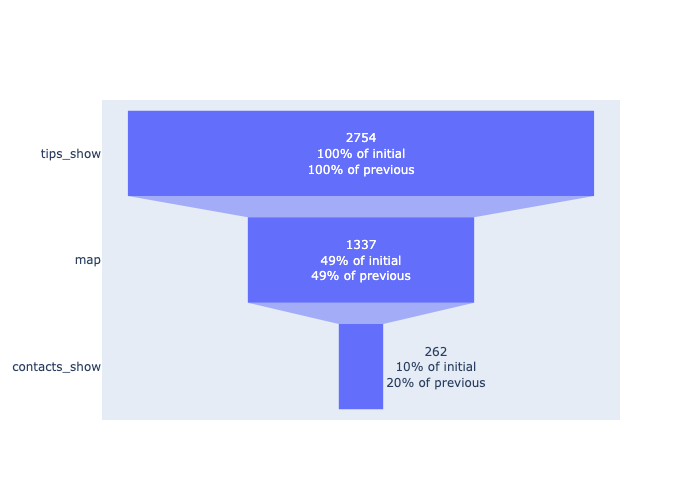

In [44]:
# 1 сценарий

#tips_show - увидел рекомендованные объявления
#map - открыл карту объявлений
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'tips_show', 'map', 'contacts_show')

После просмотра объявлений по рекомендациям, почти половина пользователей (49%) переходит посмотреть карту. И 20% из них затем открывают контакты.

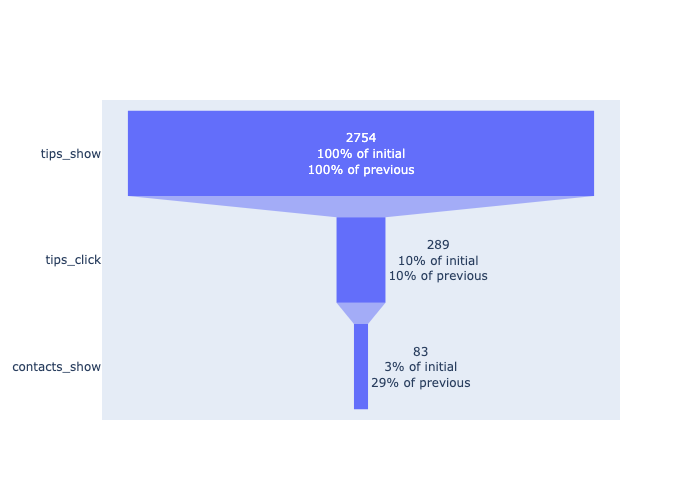

In [45]:
# 2 сценарий

#tips_show - увидел рекомендованные объявления
#tips_click - кликнул по рекомендованному объявлению
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'tips_show', 'tips_click', 'contacts_show')

После просмотра объявлений по рекомендациям, всего 10% кликают на объявление. И 29% из них просматривают номер телефона.

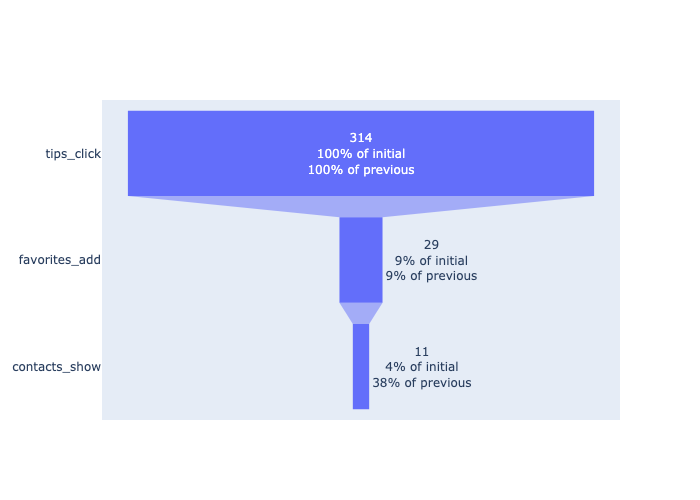

In [46]:
# 3 сценарий

#tips_click - кликнул по рекомендованному объявлению
#favorites_add — добавил объявление в избранное
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'tips_click', 'favorites_add', 'contacts_show')

После клика по рекомендованному объявлению, всего 9% добавляют в избранное объявление. Но при этом 38% из них затем возвращается и просматривает контакты.

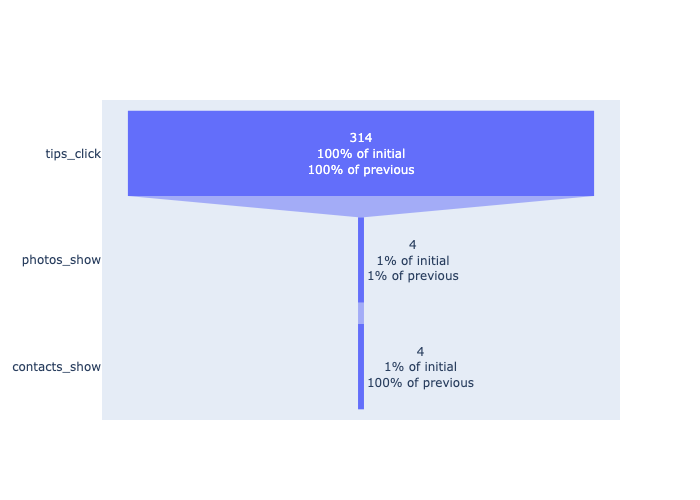

In [47]:
#4 сценарий

#tips_click - кликнул по рекомендованному объявлению
#photos_show — посмотрел фотографии в объявлении
#contacts_show - посмотрел номер телефона

funnel(filter_df, 'tips_click', 'photos_show', 'contacts_show')

После клика по рекомендованному объявлению, всего 1% пользователей просматривает фотографии. Но все из них (100%) просматривали номер телефона. 

**Выводы**\
Мы рассмотрели разные сценарии поведения пользователей в приложении. Среди популярных сценариев многие не оканчиваются целевым действием. Это нормально, не всегда пользователи быстро находят нужное им объявление и смотрят на контакты. Есть и такие сценарии, которые начинаются сразу с целевого действия – просмотра контактов. Скорее всего такие пользователи пришли по прямой ссылке на контакты.

Нам было недостаточно только популярных сценариев для полного понимания картины. Поэтому для анализа мы рассматривали и дополнительные сценарии, которые кажутся логичными - то, как пользователи должны по идее действовать в приложении. 

Более детальные выводы:

*Пользователи, которые пришли через поиск*
* После поиска по сайту, на просмотр фотографий переходит 39% пользователей. И 30% переходит затем к просмотру номера телефона, что составляет 12% от исходного числа пользователей.
* После поиска по сайту всего 20% открывает карточку объявления. И 22% из них открывают номер телефона.
* После поиска по сайту всего 12% пользователей добавляет объявление в избранное. Но 37% из них возвращается к объявлению и открывает номер телефона. Значит, добавление в избранное хорошо работает для конверсии в целевое действие.
* Всего 28% пользователей после поиска открывает карту. 19% из них открывает номер телефона.

*Пользователи, которые пришли через рекомендации*
* После просмотра объявлений по рекомендациям, почти половина пользователей (49%) переходит посмотреть карту. И 20% из них затем открывают контакты.
* После просмотра объявлений по рекомендациям, всего 10% кликают на объявление. И 29% из них просматривают номер телефона.
* После клика по рекомендованному объявлению, всего 9% добавляют в избранное объявление. Но при этом 38% из них затем возвращается и просматривает контакты.
* После клика по рекомендованному объявлению, всего 1% пользователей просматривает фотографии. Но все из них (100%) просматривали номер телефона.

**Посмотрим, какие события влияют на конверсию в целевое действие? Рассмотрим каждое действие отдельно и построим воронки**

Для этого введем новую функцию, которая будет составлять воронку для двух событий.

In [48]:
def second_funnel (data, event1, event2):
    a = data[data['event_name'] == event1]
    a_id = a['user_id'].unique()
    a = a['user_id'].nunique()
        
    b = data.query('user_id in @a_id')
    b = b[b['event_name'] == event2]
    b_id = b['user_id'].unique()
    b = b['user_id'].nunique()
        
    x = [a, b]
    y = [event1, event2]
        
    fig = go.Figure(go.Funnel(
        y = y,
        x = x,
        textinfo = "value+percent initial + percent previous"))
    fig.show()

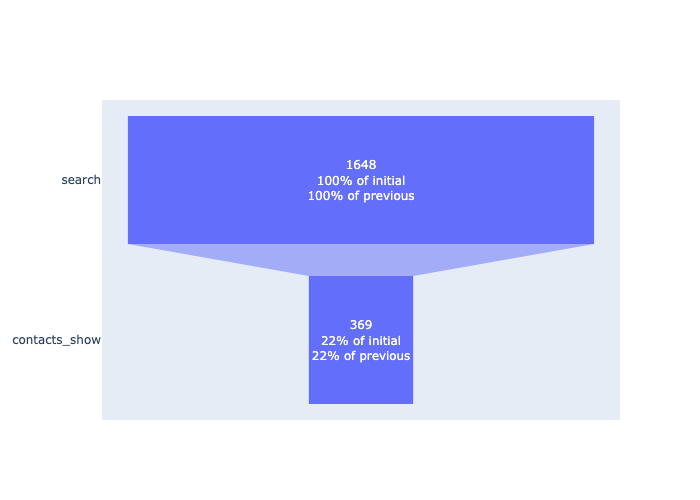

In [49]:
# search - contacts_show
second_funnel(filter_df, 'search', 'contacts_show')

После поиска, контакты просматривают 22% пользователей.

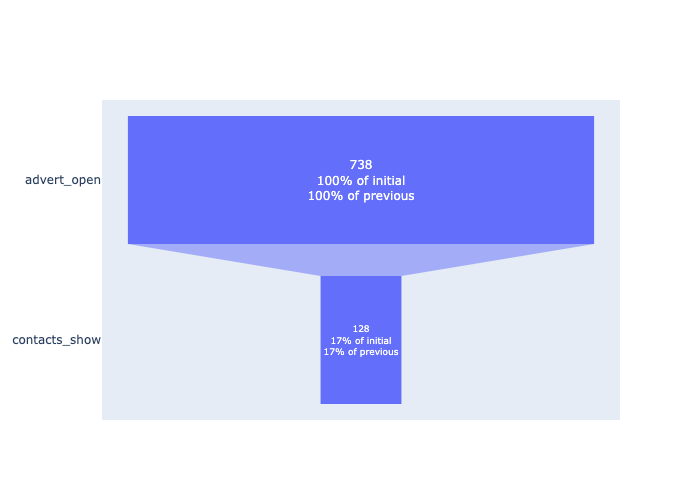

In [50]:
# advert_open - contacts_show
second_funnel(filter_df, 'advert_open', 'contacts_show')

После открытия карточки объявления, контакты просматривают 17% пользователей.

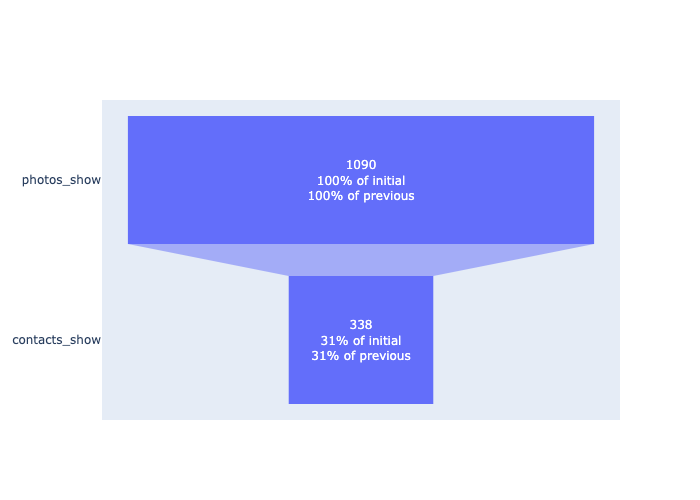

In [51]:
# photos_show - contacts_show
second_funnel(filter_df, 'photos_show', 'contacts_show')

После просмотра фотографий, контакты просматривают 31% пользователей.

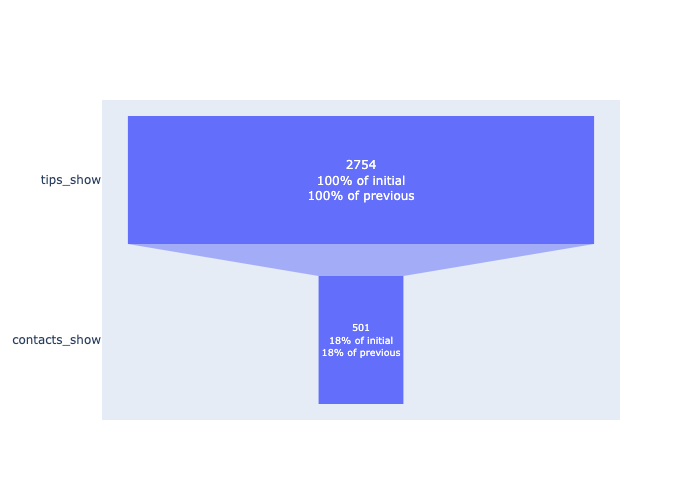

In [52]:
# tips_show - contacts_show
second_funnel(filter_df, 'tips_show', 'contacts_show')

После того, как пользователь увидел рекомендованное объявление, контакты просматривают 18% пользователей.

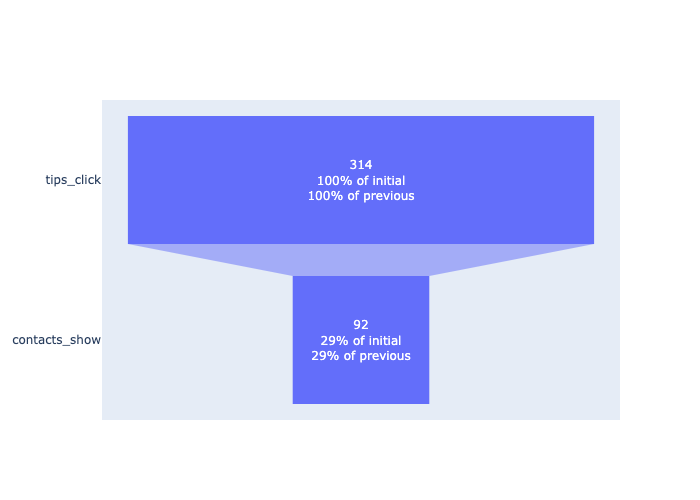

In [53]:
# tips_click - contacts_show
second_funnel(filter_df, 'tips_click', 'contacts_show')

После того, как пользователь кликнул по рекомендованному объявлению, контакты просматривают 29% пользователей.

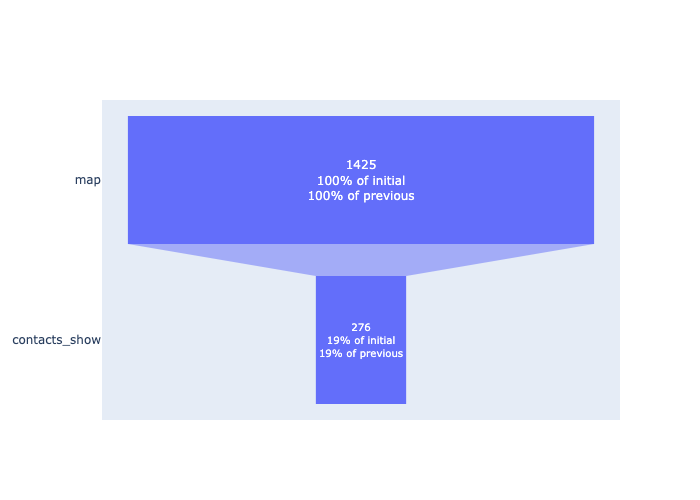

In [54]:
# map - contacts_show
second_funnel(filter_df, 'map', 'contacts_show')

После просмотра карты объявлений, контакты просматривают 19% пользователей.

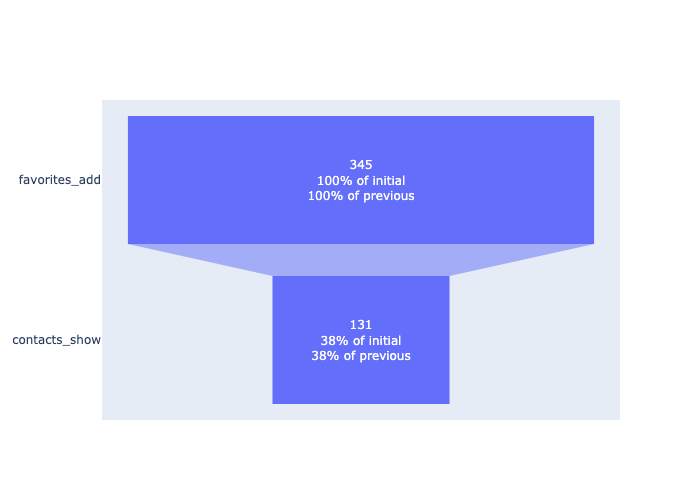

In [55]:
# favorites_add - contacts_show
second_funnel(filter_df, 'favorites_add', 'contacts_show')

После добавление в избранное, контакты просматривают 38% пользователей.

**Выводы**

По количеству событий лидирует просмотр объявлений (tips_show), но это автоматическое, а не пользовательское действие. По количеству действий пользователя популярнее является поиск, его использовало 1647 уникальных пользователей. Но хорошая конверсия в целевое действие -просмотр контактов- у тех, кто кликает по объявлению. Значит, система рекомендаций работает корректно. Но, как мы видим, всего 314 пользователей совершают это действие. Возможно, клиентам стоит донести ценность кликов по рекомендованным объявлением - рассказать о том, что чем больше релевантных просмотров будет со стороны пользователей, тем больше мы будем показывать интересные для них объявления.

Также хорошо работает на открытие номера телефона добавление в избранное (38%) и просмотр фотографий (31%).

**Оценим, какие действия чаще совершают те пользователи, которые просматривают контакты**

In [56]:
filter_df

,event_time,event_name,user_id,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1
...,...,...,...,...
54919,2019-10-28 07:08:57.160017,search,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807
54920,2019-10-28 07:13:03.805332,search,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807
54921,2019-10-28 07:14:21.177488,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807
54922,2019-10-28 07:15:10.094101,photos_show,ffe68f10-e48e-470e-be9b-eeb93128ff1a,9807


In [57]:
users_contact = filter_df[filter_df['event_name'] == 'contacts_show'] # отбираем пользователей, которые смотрели контакты
users_id = users_contact['user_id'].unique() # добавляем их в отдельную пеоеменную
        
users_actions = filter_df.query('user_id in @users_id')
users_actions = users_actions.groupby('event_name')\
                             .agg({'event_name':'count'})\
                             .rename(columns={'event_name': 'total_events'})\
                             .sort_values(by='total_events', ascending=False)\
                             .reset_index()
users_actions

,event_name,total_events
0,tips_show,9658
1,contacts_show,3791
2,photos_show,3651
3,search,1954
4,advert_open,1252
5,map,759
6,contacts_call,541
7,favorites_add,393
8,tips_click,282


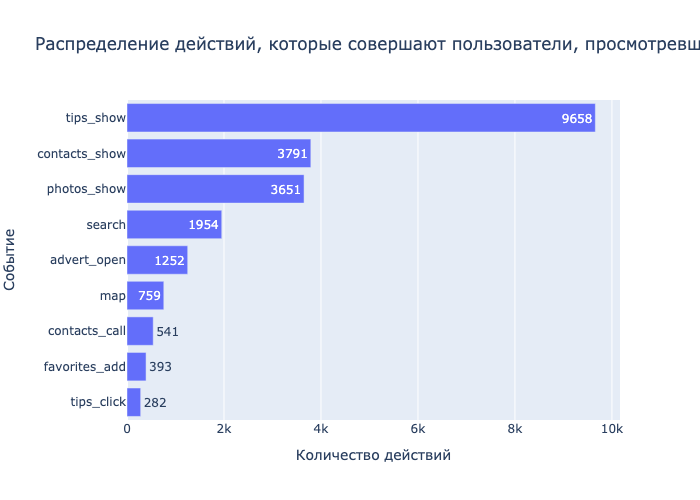

In [58]:
# визуализируем данные
fig = px.bar(users_actions, x='total_events', y='event_name', title='Распределение действий, которые совершают пользователи, просмотревшие контакты', labels={
                     'event_name': 'Событие', 'total_events': 'Количество действий'}, text="total_events")\
        .update_yaxes(categoryorder='total ascending')
fig.show()

Мы выделили тех, кто просматривал контакты, и посмотрели, какие действия они чаще всего совершают. Вот, что мы выяснили: 
* Больше всего такие пользователи смотрят рекомендованные объявления.
* С большим отрывом идёт просмотр фотографий. 
* Меньше всего пользователи кликают по рекомендованным объявлениям. Это странно, ведь, как мы помним, конверсия в просмотр контактов от тех, кто кликает по объявлению, неплохая.

**Узнаем, как различается время между распространенными событиями пользователей**

In [59]:
# посмотрим на распределение событий по популярности
actions = filter_df.groupby('event_name')\
                   .agg({'event_name':'count'})\
                   .rename(columns={'event_name': 'total_events'})\
                   .sort_values(by='total_events', ascending=False)\
                   .reset_index()
actions

,event_name,total_events
0,tips_show,36576
1,photos_show,9831
2,search,6644
3,advert_open,5654
4,contacts_show,3791
5,map,3442
6,favorites_add,1323
7,tips_click,763
8,contacts_call,541


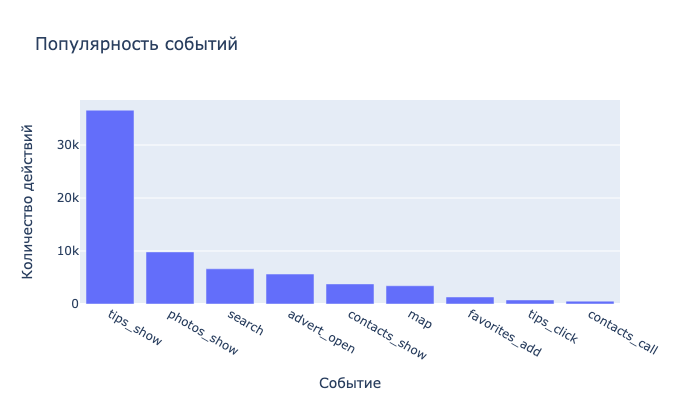

In [60]:
fig = px.bar(actions, x='event_name', y='total_events', height=400, title='Популярность событий', labels={
                     'event_name': 'Событие', 'total_events': 'Количество действий'})
fig.show()

Самым распространенным событием является tips show – когда человек увидел рекомендованное объявление. Следующим действием после него идет photos_show - просмотр фотографий в объявлении. Рассмотрим эту пару событий и узнаем, как различается время между ними. 

In [61]:
tips_show = filter_df[filter_df['event_name'] == 'tips_show'] # датафрэйм с событиями tips_show
photo = filter_df[filter_df['event_name'] == 'photos_show'] # датафрэйм с событиями photos_show

tips_show_photo = tips_show.merge(photo, how='inner', on='session_id') # объединяем таблицы в одну
tips_show_photo

# оставим в переменной номера сессий, в которых есть оба события tips_show и photos_show
sessions_id = tips_show_photo['session_id'].unique()
tips_photo = filter_df[(filter_df['event_name'] == 'tips_show') | (filter_df['event_name'] == 'photos_show')]
tips_photo = tips_photo[tips_photo['session_id'].isin(sessions_id)]

# через сводную таблицу аггрегируем по минимальной дате события, чтобы оставить для каждой сессии пару событий tips_show-photos_show
tips_photo2 = tips_photo.groupby(['session_id', 'event_name'], as_index=False).agg(time_event=('event_time','min'))
tips_photo2

,session_id,event_name,time_event
0,2379,photos_show,2019-10-15 22:22:19.151393
1,2379,tips_show,2019-10-15 22:26:41.173808
2,2563,photos_show,2019-10-23 20:01:26.315311
3,2563,tips_show,2019-10-23 20:07:04.129892
4,5382,photos_show,2019-10-23 23:09:35.857948
5,5382,tips_show,2019-10-23 23:16:43.404773
6,5468,photos_show,2019-11-03 10:17:32.089555
7,5468,tips_show,2019-11-03 10:26:46.891451
8,9446,photos_show,2019-10-19 18:26:48.131698
9,9446,tips_show,2019-10-19 18:38:10.488715


In [62]:
# посчитаем разницу между событиями в каждой сессии и узнаем среднее время по всем сессиям
timedelta = tips_photo2.groupby('session_id')['time_event'].diff()
timedelta.mean()

Timedelta('0 days 00:08:26.447235833')

Мы рассмотрели пару событий из распространенных действий: tips show (когда человек увидел рекомендованное объявление) и photos_show (просмотрел фотографий в объявлении). Среднее время между ними: 8 минут 26 секунд.

## 4. Проверка гипотез

Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show.

**1 гипотеза: конверсия в просмотры контактов различается у этих двух групп.**

H1 - конверсии у групп tips_show и tips_show+tips_click равны\
H2 - конверсии у групп tips_show и tips_show+tips_click не равны

In [63]:
# разделим пользователей на две группы

# 1 группа - только tips_show
group1 = filter_df[filter_df['event_name'] == 'tips_show']
group1_id = group1['user_id'].unique()

# 2 группа - tips_show + tips_click
group2 = filter_df.query('user_id in @group1_id')
group2 = group2[group2['event_name'] == 'tips_click'] 

# уникальные id пользователей 2 группы и их количество 
group2_id = group2['user_id'].unique() # список уникальных id
trials2 = group2['user_id'].nunique() # количество

# уникальные id пользователей 1 группы и их количество
group1_id = group1.query('user_id not in @group2_id') # отсекаем тех, кто совершал событие tips_click
trials1 = group1_id['user_id'].nunique()  # количество
group1_id = group1_id['user_id'].unique() # список уникальных id

# количество успехов в 1 группе:
group1_conversion = filter_df.query('user_id in @group1_id')
group1_conversion = group1_conversion[group1_conversion['event_name'] == 'contacts_show'] 
successes1 = group1_conversion['user_id'].nunique()

# количество успехов во 2 группе:
group2_conversion = filter_df.query('user_id in @group2_id')
group2_conversion = group2_conversion[group2_conversion['event_name'] == 'contacts_show'] 
successes2 = group2_conversion['user_id'].nunique()

Для проверки гипотез важно, чтобы пользователи не пересекались между группами. Проверим, нет ли одних и тех же пользователей, которые попали в обе группы.

In [64]:
# посмотрим, есть ли одни и те же пользователи, которые попали в обе группы сразу
all_users = filter_df.loc[filter_df['user_id'].isin(group1_id)& filter_df['user_id'].isin(group2_id),'user_id'].unique()
print(len(all_users))

0


In [65]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    
    print(successes1, successes2, trials1, trials2)
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = stats.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)
 
    if (p_value < alpha): 
        display('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        display('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')

In [66]:
z_test(successes1, successes2, trials1, trials2, alpha=0.05)

418 83 2465 289
p-значение:  9.39995717930131e-07


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

**2 гипотеза: Некоторые пользователи добавляют объявления в избранное, а некоторые – нет. Конверсия в просмотры контактов различается у этих двух групп.**

H1: Конверсии групп пользователей, кто добавляет в избранное, а кто нет – равны.\
H2: Конверсии групп пользователей, кто добавляет в избранное, а кто нет – различны.

In [67]:
# разделим пользователей на две группы

# 1 группа - не добавляют в избранное
group1 = filter_df[filter_df['event_name'] != 'favorites_add']
group1_id = group1['user_id'].unique() # id пользователей первой группы 

# 2 группа - добавляют в избранное 
group2 = filter_df[filter_df['event_name'] == 'favorites_add'] 

# уникальные id пользователей 2 группы и их количество
group2_id = group2['user_id'].unique() # список уникальных id
trials2 = group2['user_id'].nunique() # количество

# уникальные id пользователей 1 группы и их количество
group1_id = group1.query('user_id not in @group2_id') # отсекаем тех, чьи id попали в первую группу
trials1 = group1_id['user_id'].nunique() # количество
group1_id = group1_id['user_id'].unique() # список уникальных id

# количество успехов в 1 группе:
group1_conversion = filter_df.query('user_id in @group1_id')
group1_conversion = group1_conversion[group1_conversion['event_name'] == 'contacts_show'] 
successes1 = group1_conversion['user_id'].nunique()

# количество успехов во 2 группе:
group2_conversion = filter_df.query('user_id in @group2_id')
group2_conversion = group2_conversion[group2_conversion['event_name'] == 'contacts_show'] 
successes2 = group2_conversion['user_id'].nunique()

In [68]:
# посмотрим, есть ли одни и те же пользователи, которые попали в обе группы сразу
all_users = filter_df.loc[filter_df['user_id'].isin(group1_id)& filter_df['user_id'].isin(group2_id),'user_id'].unique()
print(len(all_users))

0


In [69]:
z_test(successes1, successes2, trials1, trials2, alpha=0.05)

829 131 3866 345
p-значение:  2.360556194958008e-12


'Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия'

## Выводы и рекомендации

Мы проанализировали поведение пользователей в мобильном приложении "Ненужные вещи". 

В ходе исследования были решены поставленные задачи и получены ответы на следующий вопросы:

**1. Какие сценарии использования приложения выделяются?**


Мы рассмотрели разные сценарии поведения пользователей в приложении. Среди популярных сценариев многие не оканчиваются целевым действием. Есть и такие сценарии, которые начинаются сразу с целевого действия – просмотра контактов. Скорее всего такие пользователи пришли по прямой ссылке на контакты.

Нам было недостаточно только популярных сценариев для полного понимания картины. Поэтому для анализа мы рассматривали и дополнительные сценарии, которые кажутся логичными - то, как пользователи должны по идее действовать в приложении.

*Более детальные выводы для пользователей, которые пришли через поиск:*

* После поиска по сайту, на просмотр фотографий переходит 39% пользователей. И 30% переходит затем к просмотру номера телефона, что составляет 12% от исходного числа пользователей.
* После поиска по сайту всего 20% открывает карточку объявления. И 22% из них открывают номер телефона.
* После поиска по сайту всего 12% пользователей добавляет объявление в избранное. Но 37% из них возвращается к объявлению и открывает номер телефона. Значит, добавление в избранное хорошо работает для конверсии в целевое действие.
* Всего 28% пользователей после поиска открывает карту. 19% из них открывает номер телефона.

*Более детальные выводы для пользователей, которые пришли через рекомендации:*

* После просмотра объявлений по рекомендациям, почти половина пользователей (49%) переходит посмотреть карту. И 20% из них затем открывают контакты.
* После просмотра объявлений по рекомендациям, всего 10% кликают на объявление. И 29% из них просматривают номер телефона.
* После клика по рекомендованному объявлению, всего 9% добавляют в избранное объявление. Но при этом 38% из них затем возвращается и просматривает контакты.
* После клика по рекомендованному объявлению, всего 1% пользователей просматривает фотографии. Но все из них (100%) просматривали номер телефона.

**2. Какие события влияют на конверсию в целевое действие?**

Мы выделили тех, кто просматривал контакты, и посмотрели, какие действия они чаще всего совершают. Вот, что мы выяснили:

* Больше всего такие пользователи смотрят рекомендованные объявления.
* Меньше всего пользователи кликают по рекомендованным объявлениям. 

Если рассматривать всех пользователей, а не только тех, кто совершил целевое действие, то среди них будет популярным поиск (его использовало 1647 уникальных пользователей). Видимо, найти нужное объявление самостоятельно сложнее, чем через рекомендации. Ведь, как мы выяснили, хорошо работает конверсия в просмотр контактов от тех, кто кликает по рекомендованному объявлению. А, значит, система рекомендаций работает корректно. Хотя всего 314 пользователей совершили это действие (это 7% от количества уникальных пользователей).

Также хорошо работает на открытие номера телефона добавление в избранное (38%) и просмотр фотографий (31%).

**3. Как различается время между распространенными событиями пользователей?**

Мы узнали, какие события пользователи совершают чаще всего и разделили каждые действия на пользовательские сессии. Мы рассмотрели пару событий из распространенных действий: tips show (когда человек увидел рекомендованное объявление) и photos_show (просмотрел фотографий в объявлении). Среднее время между ними: 8 минут 26 секунд.

**4. Проверить гипотезы о равенстве конверсий**

**Гипотеза 1:** Конверсия в просмотры контактов у групп людей, которые совершают действия tips_show+tips_click и только tips_show, отличается. У тех, кто кликает по объявлению, конверсия больше. Но пользователей, которые совершают действие tips_click мало.

**Гипотеза 2:** Некоторые пользователи добавляют объявления в избранное, а некоторые – нет. Конверсия в просмотры контактов различается у этих двух групп. У тех, кто добавляет в избранное, конверсия больше.

**Рекомендации**

* В процессе анализа мы выявили то, что многие сценарии пользовательских сессий выглядят хаотично, не отражают логичный алгоритм действий. Возможно, это связано с тем, что приложение не очень удобно и неэргономично для пользователей. Люди могут не понимать, как эффективно пользоваться приложением и нажимают кнопки бездумно. Этот момент, возможно, следует взять в работу и уточнить у тестировщиков, всё ли работает в приложении корректно.

* Мы выяснили, что пользователи в большинстве своем пользуются поиском в приложении и смотрят рекомендованные объявления. Возможно, клиентам стоит донести ценность кликов по рекомендованным объявлением - рассказать о том, что чем больше релевантных просмотров будет со стороны пользователей, тем больше мы будем показывать интересные для них объявления.